# Freshin Francis

## Data Science and Business Analytics Intern @ TSF

### Task #6 : Prediction using Decision Tree Algorithm

### Dataset : https://bit.ly/3kXTdox

In [76]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
df = pd.read_csv("iris.csv",index_col=0)

In [78]:
df.shape

(150, 5)

In [79]:
# loadin top 5 rows values from dataset
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
# renaming the columns name 
df.rename(columns={'SepalLengthCm':'sepal_length (cm)','SepalWidthCm':'sepal_width (cm)','PetalLengthCm':'petal_length (cm)','PetalWidthCm':'petal_width (cm)'}, inplace= True)

In [81]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [82]:
df.head() #checking wheather the column names are renamed or not

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
#checking for null values
df.isnull().sum()

sepal_length (cm)    0
sepal_width (cm)     0
petal_length (cm)    0
petal_width (cm)     0
Species              0
dtype: int64

For data visualization Seaborn library is used. This provides a high-level interface for drawing attractive and informative statistical graphics.

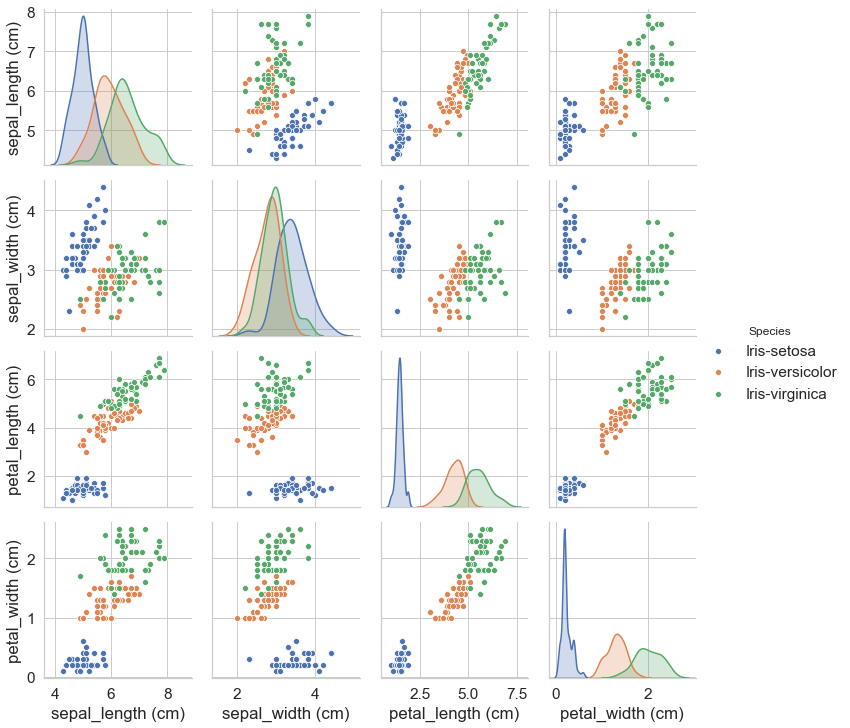

In [84]:
sns.set_style('whitegrid')
# Data Visualisation Step
sns.pairplot(df,hue ='Species')
# hue - color based on a column name  - in most case it will be Target Columns

## Split data into separate training and test set

In [85]:
X= df.drop('Species',axis=1)
y= df['Species'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5, random_state=42)
#setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is ran
X_train.shape, X_test.shape

((75, 4), (75, 4))

In [86]:
# Training using Decision Tree Classifier 
dtree=DecisionTreeClassifier()

In [87]:
#fitting the model in the decision tree classifier 
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [88]:
# predict 
pred = dtree.predict(X_test)

In [89]:
confusion_matrix(y_test, pred)

array([[29,  0,  0],
       [ 0, 20,  3],
       [ 0,  3, 20]], dtype=int64)

Confusion matrix is a table that is often used to describe the performance of a classification model or classifier on a set of test data for which the true values are known.

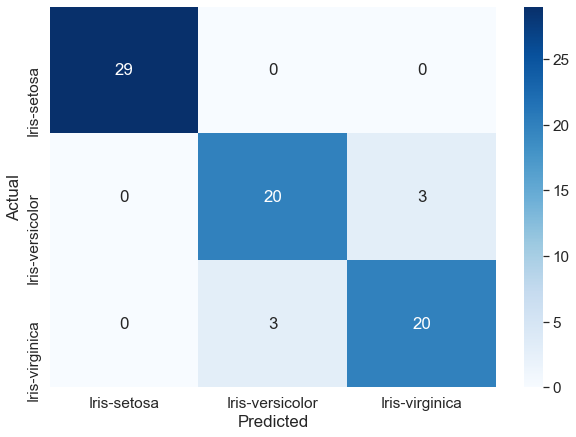

In [90]:
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name= 'Predicted'
plt.figure(figsize=(10,7))
sns.set(font_scale =1.4)
sns.heatmap(df_cm, cmap = "Blues", annot=True)

In [91]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.87      0.87      0.87        23
 Iris-virginica       0.87      0.87      0.87        23

       accuracy                           0.92        75
      macro avg       0.91      0.91      0.91        75
   weighted avg       0.92      0.92      0.92        75



In [92]:
# important features 
print(dtree.feature_importances_)

[0.         0.08695652 0.3921766  0.52086688]


In [93]:
a=pd.DataFrame({'Actual':y_test,'Predicted':pred})
a.head()

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


In [113]:
# Import necessary libraries for graph viz
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [114]:
features=list(df.columns)

In [115]:
dot_data = StringIO()

In [116]:
export_graphviz(decision_tree=dtree, out_file=dot_data, feature_names=['SepalLenCm','SepalWidCm','PetalLenCm', 'PetalWidCm'],  
                filled=True, rounded=True,
                special_characters=True)

In [117]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

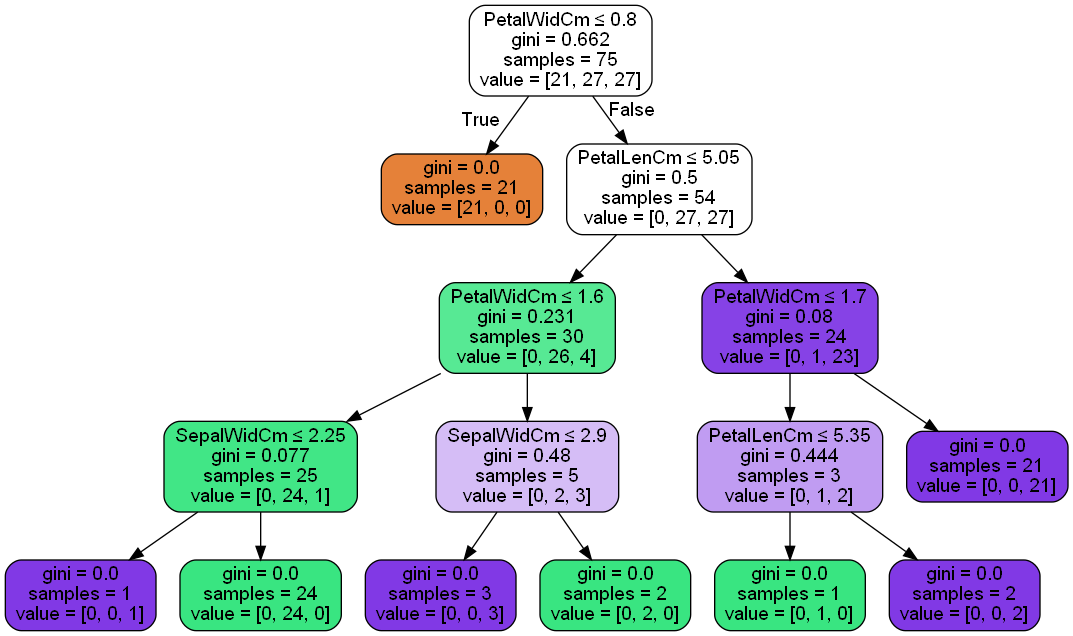

In [118]:
import pydot
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())